In [2]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe

In [3]:
tf.enable_eager_execution()
tf.executing_eagerly()

True

In [4]:
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [121]:
n = 100
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)

xy_pairs = list(product(x, y))
xv, yv = np.meshgrid(x, y)

inputs = tf.expand_dims(tf.constant(xy_pairs, dtype=np.float32), dim=1)
inputs = tf.data.Dataset.from_tensor_slices(inputs)

w1 = tf.Variable(np.random.normal(size=[2, 2]).astype(np.float32))
w2 = tf.Variable(np.random.normal(size=[2, 1]).astype(np.float32))

In [122]:
class NLLN(tf.keras.Model):
    def __init__(self, w1, w2, scale=2**125):
        super().__init__()
        self.w1 = w1
        self.w2 = w2
        self.scale = scale
    
    def call(self, x):
        h1 = (tf.matmul(x, self.w1) / self.scale) * self.scale
        output = tf.matmul(h1, self.w2)
        return output

In [123]:
class NLN(tf.keras.Model):
    def __init__(self, w1, w2):
        super().__init__()
        self.w1 = w1
        self.w2 = w2
    
    def call(self, x):
        h1 = tf.nn.relu(tf.matmul(x, self.w1))
        output = tf.matmul(h1, self.w2)
        return output

In [124]:
class Trainer(object):
    def __init__(self, model, data):
        self.model = model
        self.data = data

    def train(self):
        inputs = []
        outputs = []
        iterator = tfe.Iterator(self.data)
        for batch, data in enumerate(iterator):
            y_ = self.model(data)
            inputs.append(data[0])
            outputs.append(y_[0])  
        return inputs, outputs

In [125]:
nln = NLN(w1, w2)
nlln = NLLN(w1, w2)
nln_trainer = Trainer(nln, inputs)
nlln_trainer = Trainer(nlln, inputs)

In [126]:
nln_inputs, nln_outputs = nln_trainer.train()

In [127]:
nlln_inputs, nlln_outputs = nlln_trainer.train()

In [128]:
nln_inputs = [i.numpy() for i in nln_inputs]
nlln_inputs = [i.numpy() for i in nlln_inputs]

In [131]:
# reshape to form surface
nln_grid = np.reshape(np.array(nln_outputs), (100, 100))
nlln_grid = np.reshape(np.array(nlln_outputs), (100, 100))

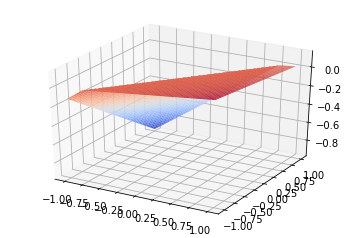

In [132]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X=xv, Y=yv, Z=nln_grid, cmap=cm.coolwarm)

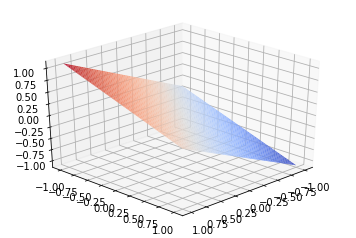

In [134]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 45)
surf = ax.plot_surface(X=xv, Y=yv, Z=nlln_grid, cmap=cm.coolwarm)